## Hyperparameter Tunning: -
- Using randomized searchCV we can find right hyper parameter to increase efficiency of random forest.
- Due to compuational limit we will take sample size of dataset to do hyperparameter tunning and then we will check its performance on whole dataset.
- In this dataset there are, x_train has (798486, 15)- (which almost 94 lakhs + data points to analyze).





In [1]:
## Importing Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation
from datetime import datetime


sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Traing and Testing dataset
train_dataset =  pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

In [3]:
## Setting Index
train_dataset.set_index(['Date', 'Store'], inplace=True)
test_dataset.set_index(['Date', 'Store'], inplace=True)

In [4]:
train_dataset.head()

DayOfWeek     Sales  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                            
2013-01-01 85             1  8.347590      0             1              1   
           259            1  8.832150      0             1              1   
           262            1  9.756552      0             1              1   
           274            1  8.039802      0             1              1   
           335            1  7.783641      0             1              1   

                  StoreType  Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                             
2013-01-01 85             1           0               1870.0       0  2013   
           259            1           1                210.0       0  2013   
           262            1           0               1180.0       0  2013   
           274            1           1               3640.0       1  2013   
           335            1           0                 90.0       1  2013   

                  Month  WeekofYear  DayofYear  Competition_Open  Promo_open  \
Date       Store                                                               
2013-01-01 85         1           1          1              15.0         0.0   
           259        1           1          1              -8.0         0.0   
           262        1           1          1              -4.0         0.0   
           274        1           1          1              -8.0         0.0   
           335        1           1          1              -8.0         0.0   

                  promo_in_sales  
Date       Store                  
2013-01-01 85                  0  
           259                 0  
           262                 0  
           274                 0  
           335                 0

In [5]:
test_dataset.head()

DayOfWeek     Sales  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                            
2015-06-13 1              5  8.356085      0             0              0   
           2              5  7.853216      0             0              0   
           3              5  8.452548      0             0              0   
           4              5  9.187993      0             0              0   
           5              5  7.676010      0             0              0   

                  StoreType  Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                             
2015-06-13 1              2           0               1270.0       0  2015   
           2              0           0                570.0       1  2015   
           3              0           0              14130.0       1  2015   
           4              2           2                620.0       0  2015   
           5              0           0              29910.0       0  2015   

                  Month  WeekofYear  DayofYear  Competition_Open  Promo_open  \
Date       Store                                                               
2015-06-13 1          6          24        164              81.0    0.000000   
           2          6          24        164              91.0   62.531646   
           3          6          24        164             102.0   50.301496   
           4          6          24        164              69.0    0.000000   
           5          6          24        164               2.0    0.000000   

                  promo_in_sales  
Date       Store                  
2015-06-13 1                   0  
           2                   0  
           3                   0  
           4                   0  
           5                   0

In [6]:
## Dependent and Independent variable segregation
x_train = train_dataset.drop('Sales',axis=1)
y_train = train_dataset[['Sales']]
x_test = test_dataset.drop('Sales',axis=1)
y_test = test_dataset[['Sales']]


In [7]:
'''x_train.dropna(inplace=True)
y_train.dropna(inplace=True)
x_test.dropna(inplace=True)
y_test.dropna(inplace=True)'''

'x_train.dropna(inplace=True)\ny_train.dropna(inplace=True)\nx_test.dropna(inplace=True)\ny_test.dropna(inplace=True)'

In [8]:
## Standard Scaler and Minmax scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stdsc = StandardScaler()
x_train[list(x_train.columns)] = stdsc.fit_transform(x_train[list(x_train.columns)])
x_test[list(x_test.columns)] = stdsc.transform(x_test[list(x_test.columns)])

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))


In [9]:
'''from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [ 1, 2],
    'min_samples_split': [ 2 ,5, 8],
    'n_estimators': [70,80,90,100]
}

rfr = RandomForestRegressor()
random_search_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=rf_params, n_iter=10,verbose = 2,cv=3, random_state=41)

random_search_rfr.fit(x_train_sample, y_train_sample)
print("Best parameters for model:", random_search_rfr.best_params_)
print("Best score for model:", random_search_rfr.best_score_)'''

'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\nrf_params = {\n    \'bootstrap\': [True, False],\n    \'max_features\': [\'auto\', \'sqrt\'],\n    \'min_samples_leaf\': [ 1, 2],\n    \'min_samples_split\': [ 2 ,5, 8],\n    \'n_estimators\': [70,80,90,100]\n}\n\nrfr = RandomForestRegressor()\nrandom_search_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=rf_params, n_iter=10,verbose = 2,cv=3, random_state=41)\n\nrandom_search_rfr.fit(x_train_sample, y_train_sample)\nprint("Best parameters for model:", random_search_rfr.best_params_)\nprint("Best score for model:", random_search_rfr.best_score_)'

#### Best parameters for model: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': True}


In [10]:
from sklearn.ensemble import RandomForestRegressor
rfr_tunned = RandomForestRegressor( bootstrap = True, max_depth=None,max_features = 'auto', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rfr_tunned.fit(x_train, y_train)

RandomForestRegressor(max_features='auto')

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initializing empty list for evaluation metrics

mae_train_eval = []
mae_test_eval = []

mse_train_eval = []
mse_test_eval = []

r2_score_eval_train = []
r2_score_eval_test = []

rmse_train_eval = []
rmse_test_eval = []

#defining function to evaluate every model
def evaluation_metrics(model):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #mean absolute error
    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)


    #mean sqaured error
    mse_train = mean_squared_error(y_pred_train, y_train)
    mse_test = mean_squared_error(y_pred_test, y_test)

    # root mean squared error
    rmse_train = mean_squared_error(y_pred_train, y_train, squared = False)
    rmse_test = mean_squared_error(y_pred_test, y_test, squared = False)

    #r2 score
    r2_score_train = r2_score(y_pred_train, y_train)
    r2_score_test = r2_score(y_pred_test, y_test)


    # Appending evaluation list
    mae_train_eval.append(mae_train)
    mae_test_eval.append(mae_test)

    mse_train_eval.append(mse_train)
    mse_test_eval.append(mse_train)

    rmse_train_eval.append(rmse_train)
    rmse_test_eval.append(rmse_test)

    r2_score_eval_train.append(r2_score_train)
    r2_score_eval_test.append(r2_score_test)

    #printing values
    print(f"Mean Absolute Error of train : {mae_train}")
    print(f"Mean Absolute Error of test : {mae_test}")
    print("****" * 9)

    print(f"Mean Squared Error of train : {mse_train}")
    print(f"Mean Squared Error of test : {mse_test}")
    print("****" * 9)

    print(f"Root mean Squared Error of train : {rmse_train}")
    print(f"Root mean Squared Error of test : {rmse_test}")
    print("****" * 9)

    print(f"R2 score of train : {r2_score_train}")
    print(f"R2 score of test : {r2_score_test}")
    print("****" * 9)




In [12]:
evaluation_metrics(rfr_tunned)

Mean Absolute Error of train : 0.005248083901665323
Mean Absolute Error of test : 0.016819743415853086
************************************
Mean Squared Error of train : 6.445365135369173e-05
Mean Squared Error of test : 0.0005582528798804412
************************************
Root mean Squared Error of train : 0.00802830314286224
Root mean Squared Error of test : 0.023627375645222243
************************************
R2 score of train : 0.9829188638249261
R2 score of test : 0.8362660885676357
************************************


In [13]:
Eval_data = pd.read_csv("Eval_data.csv")

In [14]:
eval_list = ['mae_train_eval', 'mae_test_eval', 'mse_train_eval', 'mse_test_eval', 'r2_score_eval_train', 'r2_score_eval_test', 'rmse_train_eval', 'rmse_test_eval']

#creating dict to store data
eval_dict = {i: eval(i) for i in eval_list}

df_eval = pd.DataFrame(eval_dict)

#adding model name for each accuracy
model_name = ['RFR Tunned']
df_eval.insert(0, 'Model Name', model_name)

In [15]:
Eval_data = pd.concat([Eval_data, df_eval], axis=0)
Eval_data.to_csv('Eval_data.csv', index=False)

In [16]:
Eval_data.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
df_long = Eval_data.melt(id_vars='Model Name', var_name='Metric', value_name='Value')

fig = px.bar(df_long, x='Model Name', y='Value', color='Metric', barmode='group',
             title="Model Evaluation Metrics", labels={'Value': 'Performance Accuracy'})
fig.update_layout(legend=dict(title='Metrics'), xaxis_title='Model Name', yaxis_title='Performance Accuracy')
fig.show()

In [28]:
#let's check how much model has improved from baseline model on test data

base_modelr2 =  0.7623
rf_tunnedr2 = 0.8356
performance_rfr_tunned = (rf_tunnedr2 - base_modelr2) * 100 / base_modelr2
print(f"Model has improved by {performance_rfr_tunned} %")

Model has improved by 9.615636888364167 %


In [29]:
## let's predict sales x_test

In [30]:
x_test

DayOfWeek     Promo  StateHoliday  SchoolHoliday  StoreType  \
Date       Store                                                                
2015-06-13 1       1.435044 -0.893795     -0.030641      -0.481223   0.583372   
           2       1.435044 -0.893795     -0.030641      -0.481223  -0.883841   
           3       1.435044 -0.893795     -0.030641      -0.481223  -0.883841   
           4       1.435044 -0.893795     -0.030641      -0.481223   0.583372   
           5       1.435044 -0.893795     -0.030641      -0.481223  -0.883841   
...                     ...       ...           ...            ...        ...   
2015-07-31 1111    0.855424  1.118824     -0.030641       2.078038  -0.883841   
           1112    0.855424  1.118824     -0.030641       2.078038   0.583372   
           1113    0.855424  1.118824     -0.030641       2.078038  -0.883841   
           1114    0.855424  1.118824     -0.030641       2.078038  -0.883841   
           1115    0.855424  1.118824     -0.030641       2.078038   1.316978   

                  Assortment  CompetitionDistance    Promo2     Year  \
Date       Store                                                       
2015-06-13 1       -0.943367            -0.535796 -0.995916  1.65644   
           2       -0.943367            -0.625492  1.004101  1.65644   
           3       -0.943367             1.112038  1.004101  1.65644   
           4        1.070513            -0.619085 -0.995916  1.65644   
           5       -0.943367             3.134030 -0.995916  1.65644   
...                      ...                  ...       ...      ...   
2015-07-31 1111    -0.943367            -0.455070  1.004101  1.65644   
           1112     1.070513            -0.457633 -0.995916  1.65644   
           1113     1.070513             0.488014 -0.995916  1.65644   
           1114     1.070513            -0.587051 -0.995916  1.65644   
           1115     1.070513            -0.013000  1.004101  1.65644   

                     Month  WeekofYear  DayofYear  Competition_Open  \
Date       Store                                                      
2015-06-13 1      0.058907    0.040581   0.030160          0.598043   
           2      0.058907    0.040581   0.030160          0.752894   
           3      0.058907    0.040581   0.030160          0.923231   
           4      0.058907    0.040581   0.030160          0.412221   
           5      0.058907    0.040581   0.030160         -0.625284   
...                    ...         ...        ...               ...   
2015-07-31 1111   0.352136    0.515087   0.491782         -0.454948   
           1112   0.352136    0.515087   0.491782          1.062597   
           1113   0.352136    0.515087   0.491782         -0.315581   
           1114   0.352136    0.515087   0.491782         -0.315581   
           1115   0.352136    0.515087   0.491782         -0.315581   

                  Promo_open  promo_in_sales  
Date       Store                              
2015-06-13 1       -0.680734             0.0  
           2        2.691020             0.0  
           3        2.031561             0.0  
           4       -0.680734             0.0  
           5       -0.680734             0.0  
...                      ...             ...  
2015-07-31 1111     0.613365             0.0  
           1112    -0.680734             0.0  
           1113    -0.680734             0.0  
           1114    -0.680734             0.0  
           1115     1.372102             0.0  

[46998 rows x 15 columns]

In [41]:
y_test

array([[0.67217415],
       [0.59751495],
       [0.68649568],
       ...,
       [0.75205461],
       [0.94923466],
       [0.77798507]])

In [42]:

#predictions
y_pred_test = rfr_tunned.predict(x_test)
last_six_weeks = y_test.copy()
df_sales = pd.DataFrame(last_six_weeks, columns=['Sales'])

In [45]:
df_pred = pd.DataFrame(y_pred_test, columns=['Pred_Sales'])
df_pred

,Pred_Sales
0,0.675013
1,0.601287
2,0.685991
3,0.793236
4,0.569066
...,...
46993,0.716333
46994,0.821612
46995,0.748030
46996,0.939894


In [49]:
total_pred_sales = pd.concat( [df_sales, df_pred], axis=1)

In [50]:
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= pd.read_csv("Salesdata.csv")
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

MinMaxScaler()

In [51]:

#inverse
total_pred_sales[['Sales']] = scaler.inverse_transform(total_pred_sales[['Sales']])
total_pred_sales[['Pred_Sales']] = scaler.inverse_transform(total_pred_sales[['Pred_Sales']])

In [52]:
total_pred_sales.head()

,Sales,Pred_Sales
0,27929.508083,28047.449610
1,24827.343825,24984.056801
2,28524.581911,28503.630799
3,33061.491712,32959.732915
4,23734.168614,23645.247994


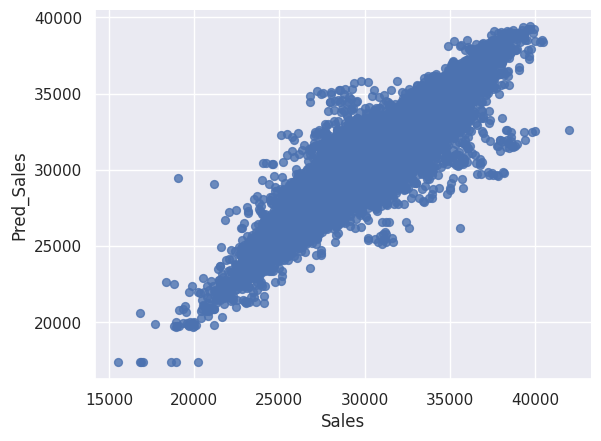

In [53]:
# @title Sales vs Pred_Sales

from matplotlib import pyplot as plt
total_pred_sales.plot(kind='scatter', x='Sales', y='Pred_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Feature Importance

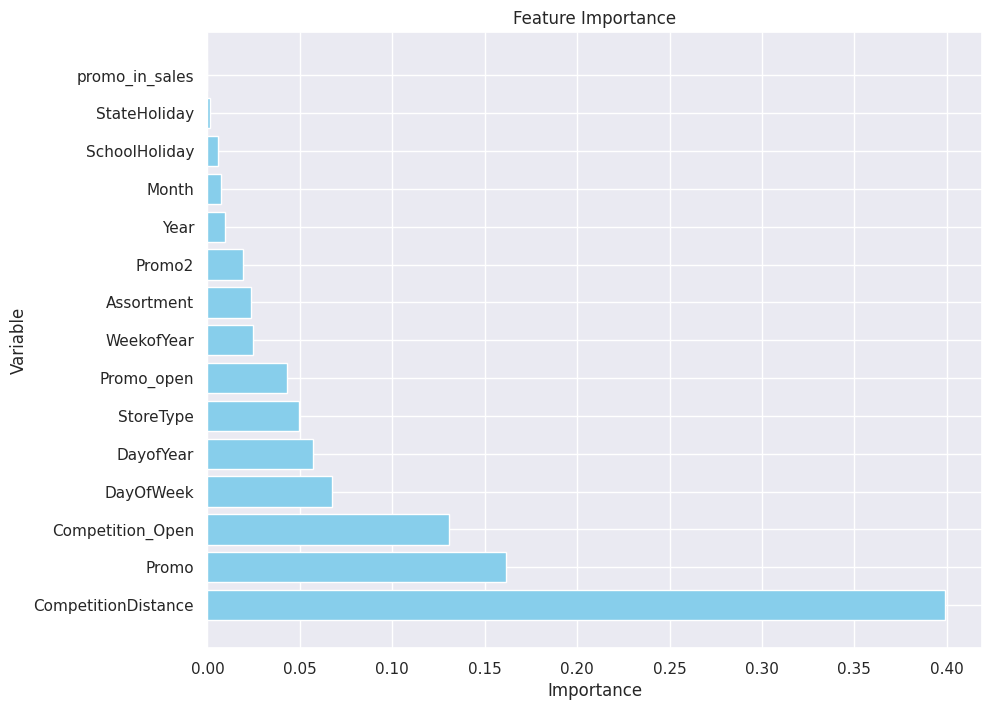

In [54]:
## Understanding adn visualizing feature importance
feature_imp = pd.DataFrame({"Variable": x_test.columns, "Importance": rfr_tunned.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace=True)
plt.figure(figsize=(10, 8))
plt.barh(feature_imp['Variable'], feature_imp['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Feature Importance')
plt.show()

# Recommendation and Conclusion:

- Sales forecasts are crucial for businesses to plan strategic initiatives and allocate resources effectively based on anticipated revenue over specific periods.
- This analysis forecasts recent six-week sales for Rossmann stores across Europe and compares model predictions with actual sales data.
- Observations validate that Mondays typically show higher sales, likely due to stores being closed on Sundays, the day with the lowest sales.
- The positive impact of promotions on customer traffic and sales is evident from the data.
- Stores located closer to competitors, typically within 0 to 10 kilometers, tend to achieve higher sales compared to those farther away, indicating the influence of location on sales performance.
- Despite being fewer in number, stores categorized as type B exhibit the highest average sales, attributed to their unique assortment offerings and Sunday opening hours.
- Outliers in the dataset, often associated with type B stores or promotional activities, demonstrate justifiable sales behavior.
- The Random Forest Tuned Model performed optimally, showing only a marginal 0.021% improvement over the basic Random Forest model, suggesting effective capture of sales trends without overfitting.
- Recommendations include expanding promotional activities across more stores to boost sales.
- Increasing the number of type B stores is advisable, given their higher sales performance and unique assortment offerings.
- Recognizing the presence of seasonality, stores should leverage promotional strategies during holiday seasons to maximize sales opportunities.